# Basis Sets

As discussed before, in order to convert the Hartree-Fock equations from an integro-differential equation to a more tractable matrix equation, we can expand the Hartree-Fock orbitals in terms of an atomic orbital basis set:
\begin{align}
\psi_i = \sum_{\mu=1}^K C_{\mu i} \phi_\mu
\end{align}

We encountered this expansion before when we introduced the Slater determinant for the hydrogen molecule H$_2$, for which the molecular orbitals can be written as a linear combination of atomic orbitals centered on each hydrogen atom:
\begin{align}
\psi_1 &= \frac{1}{\sqrt{2(1+S_{12})}} \left ( \phi_1 + \phi_2 \right ) \quad (\textrm{Bonding orbital}) \\
\psi_2 &= \frac{1}{\sqrt{2(1-S_{12})}} \left (\phi_1 - \phi_2 \right ) \quad (\textrm{Antibonding orbital}) \\
S_{12} &= \int d\textbf{r} \phi_1^*(\textbf{r}) \phi_2(\textbf{r})
\end{align}

Here we will discuss the different types of basis sets used in computational chemistry.

## What is a Basis Set?
Mathematically, a given function can be written as a linear combination of basis functions. The set of basis functions is called a **basis set**. A good analogy is the $\hat{i}, \hat{j},$ and $\hat{k}$ Cartesian unit vectors, which can be used to represent any vector in the three dimensional space. In principle, any type of basis functions can be used to represent the molecular orbitals. In practice, the basis functions need to be numerically efficient and should represent the chemical or physical system well. For example, in solids, extended plane-wave basis sets are typically used. In molecular systems, atomic orbitals, or one-electron orbitals, like those obtained for the hydrogen atom are used to construct molecular orbitals (The **LCAO-MO** approach).

The basis set expansion is exact if a **complete basis set** is used to represent the molecular orbitals; that is, an infinite number of basis functions are used. In practice, the basis set expansion is truncated at some order and the results are approximate.

## Slater- and Gaussian-Type Orbitals

The wavefunction for the hydrogen atom is given by: $\psi_{nlm}(r, \theta, \phi) = R_{nl}(r) Y_l^m(\theta, \phi)$, where $R_{nl}(r)$ represents the radial part, and $Y_l^m(\theta, \phi)$ (the spherical harmonics) represents the angular part. As shown before, the radial part involves a polynomial in $r$ multiplied by an exponential term $e^{-\zeta r}$, where $\zeta$ is some number. Atomic orbitals that have this form are called **Slater-type orbitals (STO)** and are generally written as:
\begin{align}
\phi_{\zeta, n, l, m}(r, \theta, \phi) = N Y_{l, m}(\theta, \phi) r^{n-1} e^{-\zeta r},
\end{align}
where $N$ is a normalization constant. Unlike the hydrogen radial wavefunctions, these orbitals do not have radial nodes. Radial nodes are introduced by taking linear combinations of STOs. These STO orbitals are not generally used in molecular calculations because calculations of three- and four-center two electron integrals cannot be performed analytically. However, these functions are sometimes used in highly accurate atomic or diatomic calculations or in semi-empiricial methods, where these integrals are neglected.

In molecular calculations, **Gaussian-type orbitals (GTO)** are generally used:
\begin{align}
\phi_{\zeta, n, l, m}(r, \theta, \phi) &= N Y_{l, m}(\theta, \phi) r^{2n-2-l} e^{-\zeta r^2} \\
\phi_{\zeta, l_x, l_y, l_z}(x, y, z)& = N x^{l_x} y^{l_y} z^{l_z} e^{-\zeta r^2}.
\end{align}

The GTOs are either written in terms of spherical or Cartesian coordinates. The total angular momentum of the orbital is given by: $L = l_x + l_y + l_z$. The spherical and Cartesian functions differ in their number of angular momentum components for $L>2$. For example, a $d-type$ orbital in spherical coordinates has five components: $Y_{2, 2}, Y_{2, 1}, Y_{2, 0}, Y_{2, -1}, Y_{2, -2}$, but in Cartesian coordinates it has six components: $x^2, y^2, z^z, xy, xz, yz$. However, these six components can be transformed to five components and one additional $s$-function ($x^2 + y^2 + z^2$). Similarly, there are ten Cartesian $f$ functions and only seven speherical functions.

Why are GTOs preferred? Because the integrals over the basis functions can be performed analytically and because of the Gaussian product theorem, which states that a product of two Gaussians is also a Gaussian.

### Differences between Slater- and Gaussian-Type Orbitals
There are two main differences between STOs and GTOs because of the use of the $r^2$ exponent:
- At the nucleus, STOs have a cusp (discontinuous derivative) while GTOs have a zero sloop.
- GTOs decay more rapidly than STOs. The tail of the wavefunction is represented poorly in GTOs.

Therefore, to adequately represents atomic orbitals, linear combinations of GTOs are used to represent to the atomic orbitals. This required increase in the number of basis functions for GTOs relative to STOs is more than compensated for by the speedup in integral calculation.

### Contracted Gaussian-Type Orbitals and the STO-nG Basis Sets:
Atomic orbitals written as a linear combination of GTOs are called **contracted GTO**. The STO-nG basis sets are "Slater-type orbitals approximated by n Gaussians". The general form is given by:
\begin{align}
\phi^c_{\{\zeta\}} = \sum_i c_i \phi^p_{\zeta_i}
\end{align}

The contracted Gaussian $\phi^c$ is constructed from a linear combination of **primitive** Gaussians, each with a different exponent $\zeta$. We will illusrate below the benefit of contraction for $1s$ orbitals.

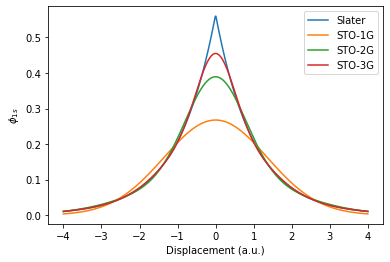

In [1]:
# This is basically figure 3.3 in Szabo and Ostlund 
import numpy as np
import matplotlib.pyplot as plt

def slater(zeta, r):
    return (zeta**3/np.pi)**0.5*np.exp(-zeta*np.abs(r))

def gaussian(zeta, r):
    return (2*zeta/np.pi)**(3.0/4.0)*np.exp(-zeta*np.abs(r**2))

def sto_1g(r):
    return gaussian(0.270950, r)

def sto_2g(r):
    return 0.678914*gaussian(0.151623, r) + 0.430129*gaussian(0.851819, r)

def sto_3g(r):
    return 0.444635*gaussian(0.109818, r) + 0.535328*gaussian(0.405771, r) + 0.154329*gaussian(2.22766, r)

plt.figure()

r = np.linspace(-4, 4, 500)

plt.plot(r, slater(1, r), label="Slater")
plt.plot(r, sto_1g(r), label="STO-1G")
plt.plot(r, sto_2g(r), label="STO-2G")
plt.plot(r, sto_3g(r), label="STO-3G")

plt.xlabel("Displacement (a.u.)")
plt.ylabel("$\phi_{1s}$")
plt.legend()
plt.show()

Thus, increasing the number of primitive Gaussians improves the shape of the basis function. It is important to note that the contraction coefficients and the exponents are *fixed* during the Hartree-Fock procedure. Various fitting methods can be used to determine the appropriate values for the coefficients and the exponents.

### How Does Zeta Affect the Orbital Shape
The value of $\zeta$ determines the decay of the exponential. Large values of $\zeta$ cause the orbital to decay rapidly, while small values of $\zeta$ lead to a **diffuse** orbital with an extended tail.

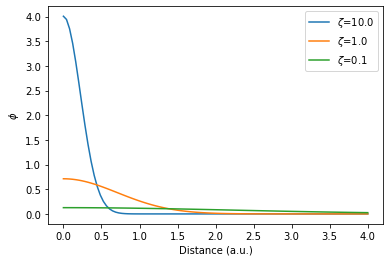

In [2]:
zetas = [10, 1, 0.1]

r = np.linspace(0, 4, 100)

fig = plt.figure()
for z in zetas:
    plt.plot(r, gaussian(z, r), label="$\zeta$=%.1f" %z)
    
plt.xlabel("Distance (a.u.)")
plt.ylabel("$\phi$")
plt.legend()
plt.show()

## Minimal Basis Sets and the STO-nG Family
In a minimal basis set, each atomic orbital is represented by one basis function. All the atomic orbitals for a given  prinicipal quantum number are used even if some orbitals are not occupied (e.g. $p$ orbitals in Li) . Let's take a few example here:

|Atom | Minimal Basis functions | Total number |
|-----|-------------------------|--------------|
|H    | $1s$                    |1             |
|He   | $1s$                    |1             |
|Li   | $1s$ $2s$ $2p$ (3)      |5             |
|Be   | $1s$ $2s$ $2p$ (3)      |5             |
|B    | $1s$ $2s$ $2p$ (3)      |5             |
|C    | $1s$ $2s$ $2p$ (3)      |5             |
|N    | $1s$ $2s$ $2p$ (3)      |5             |
|O    | $1s$ $2s$ $2p$ (3)      |5             |
|F    | $1s$ $2s$ $2p$ (3)      |5             |
|Ne   | $1s$ $2s$ $2p$ (3)      |5             |

We will show below the definition of the basis set for hydrogen.

In [3]:
import psi4

mol = psi4.geometry("H")
basis = psi4.core.BasisSet.build(mol, 'BASIS', "sto-3g")
basis.print_detail_out()

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry H          line    19 file /home/alenaizan/miniconda3/envs/comp_chem/share/psi4/basis/sto-3g.gbs 

  -AO BASIS SET INFORMATION:
    Name                   = STO-3G
    Blend                  = STO-3G
    Total number of shells = 1
    Number of primitives   = 3
    Number of AO           = 1
    Number of SO           = 1
    Maximum AM             = 0
    Spherical Harmonics    = TRUE

  -Contraction Scheme:
    Atom   Type   All Primitives // Shells:
   ------ ------ --------------------------
       1     H     3s // 1s 

  ==> AO Basis Functions <==

    [ STO-3G ]
    spherical
    ****
    H   1
    S   3 1.00
                         3.42525091           0.15432897
                         0.62391373           0.53532814
                         0.16885540           0.44463454
    ****



We notice a few things here:
- Because this is STO-3G, the number of primitives is 3.
- The total number of basis functions (contracted Gaussians) is 1 ($1s$ orbital). 
- The primitive coefficients are 0.15432897, 0.53532814, 0.44463454
- The primitive exponents are 3.42525091, 0.62391373, 0.16885540

Now, we will do the same thing for Li.

In [4]:
import psi4

mol = psi4.geometry("Li")
basis = psi4.core.BasisSet.build(mol, 'BASIS', "sto-3g")
basis.print_detail_out()

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /home/alenaizan/miniconda3/envs/comp_chem/share/psi4/basis/sto-3g.gbs 

  -AO BASIS SET INFORMATION:
    Name                   = STO-3G
    Blend                  = STO-3G
    Total number of shells = 3
    Number of primitives   = 9
    Number of AO           = 5
    Number of SO           = 5
    Maximum AM             = 1
    Spherical Harmonics    = TRUE

  -Contraction Scheme:
    Atom   Type   All Primitives // Shells:
   ------ ------ --------------------------
       1    LI     6s 3p // 2s 1p 

  ==> AO Basis Functions <==

    [ STO-3G ]
    spherical
    ****
   LI   1
    S   3 1.00
                        16.11957500           0.15432897
                         2.93620070           0.53532814
                         0.79465050           0.44463454
    S   3 1.00
                         0.63628970          -0.09996723
                         0.

We notice a few things here:
- Because this is STO-3G, the number of primitives is 3 for each type of the orbitals, so the total is 9.
- The total number of basis functions (contracted Gaussians) is 5. 
- The exponents for the core orbital (1s) are large compared those of the valence orbitals. Core electrons are tightly bound to the nucleus.
- For STO-3G, the same orbital exponents are used for the valence $s$ and $p$ orbitals

## Shape of the Basis Set
Because the basis functions are just the atomic orbitals centered around each atom, the basis function will look similar to the familiar shapes of the orbitals. Let's plot the basis functions for a hydrogen atom in a minimal basis set.

In [5]:
import os
import psi4

psi4.core.set_output_file("output.dat")
if not os.path.exists("h_cube_files"):
    os.mkdir("h_cube_files")

mol = psi4.geometry("""H""")
psi4.set_options({'reference': "uhf"})
e, wfn = psi4.energy("scf/sto-3g", return_wfn=True)

psi4.set_options({
    'CUBEPROP_TASKS': ["BASIS_FUNCTIONS"],
    "CUBEPROP_FILEPATH": "h_cube_files"
})

psi4.cubeprop(wfn)

The above script generates a **cube** file that contains the value of the basis functions at a uniform grid around the atom. We can visualize the basis functions using the following script.

In [6]:
import nglview as nv
from IPython.display import display

view = nv.show_psi4(mol)
c1 = view.add_component('h_cube_files/Phi_1.cube')
c1.clear()
c1.add_surface(color_scheme='volume', isolevelType="value", isolevel =  0.05, color = "red" , opacity=0.5)
c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = -0.05, color = "blue", opacity=0.5)

display(view)

NGLWidget()

For a hydrogen atom described by a minimal basis set, there is only one basis function. The basis function is spherically symmetric, just like the $1s$ orbital.

Now, we will visualize the basis functions for Li. As mentioned above, there will be five basis functions.

In [7]:
import psi4
import os

if not os.path.exists("li_cube_files"):
    os.mkdir("li_cube_files")

mol = psi4.geometry("""Li""")
psi4.set_options({'reference': "uhf"})
e, wfn = psi4.energy("scf/sto-3g", return_wfn=True)

psi4.set_options({
    'CUBEPROP_TASKS': ["BASIS_FUNCTIONS"],
    "CUBIC_GRID_OVERAGE": [5, 5, 5],
    "CUBEPROP_FILEPATH": "li_cube_files"
})

psi4.cubeprop(wfn)

In [8]:
import nglview as nv
from IPython.display import display

for i in range(1, 6):
    print("Basis function %i" %i)
    view = nv.show_psi4(mol)
    c1 = view.add_component('li_cube_files/Phi_%i.cube' %i)
    c1.clear()
    c1.add_surface(color_scheme='volume', isolevelType="value", isolevel =  0.05, color = "red" , opacity=0.5)
    c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = -0.05, color = "blue", opacity=0.5)
    
    display(view)

Basis function 1


NGLWidget()

Basis function 2


NGLWidget()

Basis function 3


NGLWidget()

Basis function 4


NGLWidget()

Basis function 5


NGLWidget()

For molecules, each atom will have an associated set of basis functions. For example, N$_2$ described using a minimal basis set will have ten basis functions, five on each atom. Let's draw now the basis functions for N$_2$.

In [9]:
import psi4
import os

if not os.path.exists("n2_cube_files"):
    os.mkdir("n2_cube_files")

mol = psi4.geometry("""N 0 0 -0.5488
N 0 0 0.5488
""")
psi4.set_options({'reference': "rhf"})
e, wfn = psi4.energy("scf/sto-3g", return_wfn=True)

psi4.set_options({
    'CUBEPROP_TASKS': ["BASIS_FUNCTIONS"],
    "CUBIC_GRID_OVERAGE": [5, 5, 5],
    "CUBEPROP_FILEPATH": "n2_cube_files"
})

psi4.cubeprop(wfn)

In [10]:
import nglview as nv
from IPython.display import display

for i in range(1, 11):
    print("Basis function %i" %i)
    view = nv.show_psi4(mol)
    c1 = view.add_component('n2_cube_files/Phi_%i.cube' %i)
    c1.clear()
    c1.add_surface(color_scheme='volume', isolevelType="value", isolevel =  0.05, color = "red" , opacity=0.5)
    c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = -0.05, color = "blue", opacity=0.5)
    
    display(view)

Basis function 1


NGLWidget()

Basis function 2


NGLWidget()

Basis function 3


NGLWidget()

Basis function 4


NGLWidget()

Basis function 5


NGLWidget()

Basis function 6


NGLWidget()

Basis function 7


NGLWidget()

Basis function 8


NGLWidget()

Basis function 9


NGLWidget()

Basis function 10


NGLWidget()

## Double-, Triple-, ..., Zeta Basis Set
A minimal basis set, which has one basis function for each atomic orbital, is too small and cannot describe the flexibility of the electron. We can increase the size of the basis set systematically to generate the following ladder of basis set sizes:
- Double-zeta (DZ): Two basis functions for each atomic orbital.
- Triple-zeta (TZ): Three basis functions for each atomic orbital.
- Quadruble-zeta (QZ): 4 basis functions for each atomic orbital.
- N-zeta (NZ): N basis functions for each atomic orbital.

In practical calculations, at least a double-zeta basis set quality is required for accurate calculations. Calculations using large basis sets ($\ge$QZ) are only affordable for systems with a small number of electrons. Remeber that Hartree-Fock theory scales as $N^4$ where $N$ is the total number of basis functions. Post-Hartree-Fock methods are even more expensive.

## Split-Valence Basis Sets
Because of the large scaling of *ab initio* methods, it is profitable to decrease the total number of basis functions when possible while maintaining the accuracy. Because chemical properties are largely determined by the valence orbitals, it is reasonable to give the valence electrons more flexibilty compared to core electrons by increasing the number of valence basis functions. Furthermore, core electrons are tightly bound to the nucleus and will experience limited interaction with the molecular environment. This reasoning led to the development of **split-valnece basis sets**

In a split valence basis set, each core atomic orbital will be represented by only *one* basis function. The valence electrons will be represented by two or more basis functions depending on the size of the basis set.

### Example:
The following table lists the number of basis functions for hydrogen and second raw elements for different kinds of basis sets:

|Basis Set Type            | Hydrogen| Second Raw           |
|--------------------------|---------|----------------------|
|Minimal                   |1 ($1s$) |5 ($1s$ $2s$ $2p$ (3))|
|Double-zeta               |2        |10                    |
|Triple-zeta               |3        |15                    |
|Split-valence double zeta |2        |9                     |
|Split-valence triple zeta |2        |13                    |


## Pople Basis Sets
John Pople developed a family of basis sets with increasing size besides the minimal STO-3G basis set. The general name for the basis set is "$k$-$nlm$G". These are split-valence basis sets. $k$ is the number of primitive basis functions used to represent the core orbitals. If two numbers are present after the dash ($n$ and $l$), then this is a double zeta basis set; and if three numbers are present then this is a triple zeta basis set. $n$, $l$, and $m$ indicates how many primitive Gaussians are used to build the basis functions.

Examples:
- 3-21G: The core oritals are a contraction of three primitives. Two sets of valence orbitals are used, one is a contraction of two primitives and one is a single Gaussian.
- 6-31G: The core oritals are a contraction of six primitives. Two sets of valence orbitals are used, one is a contraction of 3 primitives and one is a single Gaussian.
- 6-311G: The core oritals are a contraction of six primitives. Three sets of valence orbitals are used, one is a contraction of 3 primitives, one is a single Gaussian, and the third is also a single Gaussian.

Below we show the definition of the 6-31G basis set for Li. 

In [11]:
import psi4

mol = psi4.geometry("Li")
basis = psi4.core.BasisSet.build(mol, 'BASIS', "6-31g")
basis.print_detail_out()

## Polarization Functions
It is not sufficient to increase the number of primitive Gaussians or the number of valence orbitals in order to improve the basis set and approach the basis set limit. Increasing the angular momentum of the basis set is necessary to add angular flexibility of the basis set.

For example, consider the formation of an H$_2$ molecule. Each hydrogen atom will contribute a spherically symmetric $1s$ orbital. The $1s$ orbitals in the two hydrogen atoms interfere constructively to form a bonding molecular orbital. However, the electron density of the H$_2$ molecule is not spherically symmetric. The $s$ orbitals are not sufficient to describe the *polarization* of the electron density because of the approach of two atoms. One solution is introduce $p$ orbitals that can mix with the $s$ orbitals in order to describe the shape of the electron density more accurately.

More generally, a basis function wuth angular momentum $l$ is polarized by mixing it with a basis function of angular momentum $l+1$. This gives new types of basis sets called "polarized double-zeta", "polarized triple-zeta", etc.

For Pople basis sets, polarization is indicated by "\*" or by letters in parenthesis. The latter scheme is preferable because it is more explicit. Polarization functions can be added to heavy (non-hydrogen) atoms only or also to hydrogen atom. We list below some polarized Pople basis sets:
- 6-31G* or 6-31G(d): 6-31G with added $d$ polarization on heavy atoms.
- 6-31G** or 6-31G(d, p): 6-31G* with added $p$ polarization on hydrogen atoms.
- 6-311G(2df, 2pd): 6-311G with added two sets of $d$ functions and one set of $f$ functions for heavy atoms, and two sets of $p$ orbitals and one set of $d$ orbitals for hydrogen atoms.

Below we show the definition of the 6-31G(d) for Li.

In [12]:
import psi4

mol = psi4.geometry("Li")
basis = psi4.core.BasisSet.build(mol, 'BASIS', "6-31g(d)")
basis.print_detail_out()

## Diffuse Functions

For anions, excited electronic states, and weakly bound complexes, the tails of the electron density need to be described properly. This can be achieved by "augmenting" the basis set with **diffuse functions**. As mentioned above, diffuse functions have small $\zeta$ values that allow the Gaussians to decay slowly with distance.

In Pople basis sets, diffuse functions are indicated by "+". One "+" indicates that diffuse functions are added to heavy atoms only. "++" indicates that diffuse functions are also added to hydrogen atoms.

Examples:
- 6-31+G(d): 6-31G(d) with added diffuse functions on heavy atoms.
- 6-31++G(d): 6-31G(d) with added diffuse functions on heavy atoms and hydrogen atoms.

In [13]:
import psi4

mol = psi4.geometry("Li")
basis = psi4.core.BasisSet.build(mol, 'BASIS', "6-31+g(d)")
basis.print_detail_out()

## Dunning's Correlation-Consistent Basis Sets
Basis sets optimized at the Hartree-Fock level may not be appropriate for correlated post-Hartree-Fock calculations.
Therefore, Thom Dunning developed a family of basis sets optimized using correlated (CISD) calculations. These basis sets are denoted "cc-pVXZ":
- cc: correlation-consistent
- p: polarized
- V: split-valence
- XZ: X-zeta; X=D, T, Q, 5, et.

"Correlation-consistent" means that the basis sets are designed such that functions that contribute similar amounts of correlation energy are included together, regardless of the function type. For example, polarization functions are added in the order: $1d$, $2d1f$, $3d2f1g$. These Dunning's basis set are designed to converge systematically to the basis set limit. The table below lists the basis functions used for hydrogen and second-raw elements:

|Basis   | Hydrogen    | Second Raw    |
|--------|-------------|---------------|
|cc-pVDZ |$$2s1p$$     |$$3s2p1d$$     |
|cc-pVTZ |$$3s2p1d$$   |$$4s3p2d1f$$   |
|cc-pVQZ |$$4s3p2d1f$$ |$$5s4p3d2f1g$$ |

The Dunning's basis set can also be *augmented* with diffuse functions. Augmented basis sets are denoted "aug-cc-pVXZ". Augmentation adds one function with a smaller exponent for each angular momentum. Cheaper versions of the augmented basis sets are the *calendar* basis sets of Truhlar, which add fewer diffuse functions. For example, the jul-cc-pVXZ basis set removes diffuse functions on hydrogens. The jun-cc-pVXZ removes diffuse functions on hydrogen and the highest angular momentum subshell from heavy atoms. For third raw systems, additional tight $d$-functions were added to improve the accuracy; the basis sets are denoted "cc-pV(X+d)Z".

In post-Hartree-Fock calculations, often only the valence electrons are correlated and the core electrons are *frozen*. If the correlation of core electrons is needed, the cc-pVXZ basis sets are not approporiate. For that purpose, the cc-pCVXZ family has additional tight basis functions (large $\zeta$ exponent). These basis sets are designed to recover core-core and core-valence electron correlation. The cc-pwCVXZ basis sets focus on the more chemical relavent core-valence electron correlation.

In [14]:
import psi4

mol = psi4.geometry("Li")
basis = psi4.core.BasisSet.build(mol, 'BASIS', "cc-pvdz")
basis.print_detail_out()

## The Complete Basis Set Limit

Calculations with a finite basis set are inherently approximate. There are two approaches to deal with this problem:
- Perform calculations using increasingly larger basis sets and estimate the basis set limit.
- Balance the error in the method (e.g. Hartree-Fock) with the error in the basis set. 

The second approach requires extensive benchmarking and validation in order to determine the appropriate basis set for a given level of theory and for a particular quantity of interest. However, it is more afforable for systems with a large number of electrons, where it is difficult to use large basis sets.

We will illustrate here the convergence to the basis set limit for H$_2$ calculated at the Hartree-Fock theory. The Hartree-Fock energy computed at the basis set limit is called the **Hartree-Fock limit**. 

Zeta        # Basis functions       Energy (Hartree)
1           2                       -1.116759       
2           10                      -1.128700       
3           28                      -1.132968       
4           60                      -1.133467       
5           110                     -1.133616       
6           182                     -1.133634       


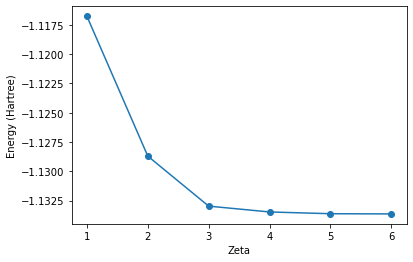

In [15]:
import psi4
import matplotlib.pyplot as plt

psi4.core.set_output_file('output.dat', True)

psi4.set_options({"scf_type": "pk", "reference": "rhf"})

mol = psi4.geometry("""0 1
H
H 1 0.74
""")

basis_sets = ["sto-3g", "cc-pvdz", "cc-pvtz", "cc-pvqz", "cc-pv5z", "cc-pv6z"]

energies = []
print("%-12s%-24s%-16s" %("Zeta", "# Basis functions", "Energy (Hartree)"))
for i, basis in enumerate(basis_sets):
    e, wfn = psi4.energy("scf/" + basis, return_wfn=True)
    energies.append(e)
    
    basisset_object = wfn.basisset()
    nbf = basisset_object.nbf()
    
    print("%-12i%-24i%-16.6f" %(i + 1, nbf, e))
    

zeta = range(1, 7)

plt.figure()
plt.plot(zeta, energies, "-o")
plt.xlabel("Zeta")
plt.ylabel("Energy (Hartree)")

plt.show()

In practice, it is generally not affordable to use a very large basis set to reach the basis set limit. The basis set limit is often obtained by extrapolating the energies calculated using two different basis sets (e.g. cc-pVTZ and cc-PVQZ) using various formula. One additional difficulty in obtaining converged results is the rate of convergence of the energy for a given method. Hartree-Fock and density functional theory energies converge faster than the correlation energy does in post-Hartree-Fock methods. One solution to this challenge is the development of basis sets that converge faster for correlated method. cc-pVXZ-F12 is one such family of basis sets that incorporate basis functions that depend on the inter-electronic distance.

In [16]:
# Extrapolation to the complete basis set limit can be done automatically in psi4
psi4.energy("scf/cc-pv[tq]z")

-1.1335886277991039

# Hartree-Fock Molecular Orbitals

In Hartree-Fock theory, a basis set is introduced to faciliate solving the Hartree-Fock equation. The molecular orbitals (MO) $\psi$ are written as a linear combination of atomic orbitals (AO) $\phi$ (The **LCAO-MO** approach), where the following expansion is used: 

\begin{align}
\psi_i = \sum_{\mu=1}^K C_{\mu i} \phi_\mu
\end{align}

The Hartree-Fock-Roothan equation given by:
\begin{align}
\textbf{FC} &=\textbf{SC} \epsilon,
\end{align}

is then solved self-consistently and the optimum values of the expansion coefficients $C$ (those that minimize the energy) are determined. The molecular orbitals that are formed using these optimum expansion coefficients are called the **canonical molecular orbitals**. The number of molecular orbitals is equal to the number of atomic orbitals. How do these orbitals look like? We will show the canonial orbitals for H$_2$ calculated using a minimal basis set, where only $1s$ functions are present for hydrogen.

In [17]:
import psi4
import os
import nglview as nv
from IPython.display import display

if not os.path.exists("h2_cube_files"):
    os.mkdir("h2_cube_files")

psi4.core.set_output_file("output.dat", True)
mol = psi4.geometry("""0 1
H
H 1 0.74
""")

e, wfn = psi4.energy("scf/sto-3g", return_wfn=True)

psi4.set_options({
    'CUBEPROP_TASKS': ["ORBITALS", "BASIS_FUNCTIONS"],
    "CUBEPROP_FILEPATH": "h2_cube_files"
})

psi4.cubeprop(wfn)

print("Hydrogen Molecule")
view = nv.show_psi4(mol)
display(view)

print("Basis function 1")
view = nv.show_psi4(mol)
c1 = view.add_component('h2_cube_files/Phi_1.cube')
c1.clear()
c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = 0.05 , color = "red" , opacity=0.5)
c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = -0.05, color = "blue", opacity=0.5)

display(view)

print("Basis function 2")
view = nv.show_psi4(mol)
c1 = view.add_component('h2_cube_files/Phi_2.cube')
c1.clear()
c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = 0.05 , color = "red" , opacity=0.5)
c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = -0.05, color = "blue", opacity=0.5)

display(view)

print("Molecular Orbital 1: Bonding Orbital")
view = nv.show_psi4(mol)
c1 = view.add_component('h2_cube_files/Psi_a_1_1-Ag.cube')
c1.clear()
c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = 0.05 , color = "red" , opacity=0.5)
c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = -0.05, color = "blue", opacity=0.5)

display(view)

print("Molecular Orbital 2: Antibonding Orbital")
view = nv.show_psi4(mol)
c1 = view.add_component('h2_cube_files/Psi_a_2_1-B1u.cube')
c1.clear()
c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = 0.05 , color = "yellow", opacity=0.5)
c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = -0.05, color = "green" , opacity=0.5)

display(view)

Hydrogen Molecule


NGLWidget()

Basis function 1


NGLWidget()

Basis function 2


NGLWidget()

Molecular Orbital 1: Bonding Orbital


NGLWidget()

Molecular Orbital 2: Antibonding Orbital


NGLWidget()

Now let's calculate the molecular orbitals for water. For water in a minimal basis set, there are seven basis functions.

In [18]:
import psi4
import os
import nglview as nv
from IPython.display import display
import ipywidgets as widgets
import glob

if not os.path.exists("h2o_cube_files"):
    os.mkdir("h2o_cube_files")

psi4.core.set_output_file('output.dat', True)

mol = psi4.geometry("""0 1
H
O 1 r
H 2 r 1 a

r = 1.08
a = 107.5      
""")

e, wfn = psi4.energy("scf/sto-3g", return_wfn=True)
nocc_mo = wfn.nalpha()

psi4.set_options({
    'CUBEPROP_TASKS': ["ORBITALS", "BASIS_FUNCTIONS"],
    "CUBEPROP_FILEPATH": "h2o_cube_files"
})

psi4.cubeprop(wfn)

def view_basis_fuction(n):
    view = nv.show_psi4(mol)
    c1 = view.add_component('h2o_cube_files/Phi_%i.cube' %n)
    c1.clear()
    c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = 0.05 , color = "red" , opacity=0.5)
    c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = -0.05, color = "blue", opacity=0.5)
    display(view)

print("Basis Functions")
display(widgets.interactive(view_basis_fuction, n=widgets.IntSlider(min=1, max=7, step=1)))

MO_names = [f.split("/")[1] for f in sorted(glob.glob("h2o_cube_files/Psi_a*cube"))]
def view_MOs(n):
    view = nv.show_psi4(mol)
    mo = MO_names[n]
    print(mo)
    c1 = view.add_component("h2o_cube_files/" + mo)
    c1.clear()
    
    # Color the occupied and virtual orbitals differently
    if n < nocc_mo:
        c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = 0.05 , color = "red" , opacity=0.5)
        c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = -0.05, color = "blue", opacity=0.5)
        
    else:
        c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = 0.05 , color = "yellow", opacity=0.5)
        c1.add_surface(color_scheme='volume', isolevelType="value", isolevel = -0.05, color = "green" , opacity=0.5)
    
    display(view)

display(widgets.interactive(view_MOs, n=widgets.IntSlider(min=0, max=len(MO_names)-1, step=1)))

Basis Functions


interactive(children=(IntSlider(value=1, description='n', max=7, min=1), Output()), _dom_classes=('widget-inte…

interactive(children=(IntSlider(value=0, description='n', max=6), Output()), _dom_classes=('widget-interact',)…

## Useful Resources

- Szabo, A.; Ostlund, N. S. *Modern Quantum Chemistry: Introduction to Advanced Electronic Structure Theory*; Dover Publications: Mineola, NY, 1996. (Sections 3.5.1 and 3.6)   
- Cramer, C. J. *Essentials of Computational Chemistry: Theories and Models*, 2nd ed.; John Wiley & Sons: Chichester, England, 2004. (Section 6.2)  
- Jensen, F. *Introduction to Computational Chemistry*, 3rd ed.; John Wiley & Sons: Nashville, TN, 2017. (Chapter 5)
- Sherrill's notes: http://vergil.chemistry.gatech.edu/courses/chem6485/pdf/basis-sets.pdf